In [1]:
#impoting necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [ ]:
#loading the dataset
df = pd.read_csv("Salary_Data.csv")

In [ ]:
#display the dataset
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
#encoding categorical data
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Education Level'] = le.fit_transform(df['Education Level'])
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,Software Engineer,5.0,90000.0
1,28.0,0,3,Data Analyst,3.0,65000.0
2,45.0,1,5,Senior Manager,15.0,150000.0
3,36.0,0,0,Sales Associate,7.0,60000.0
4,52.0,1,3,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0,5,Director of Marketing,20.0,200000.0
6700,32.0,1,2,Sales Associate,3.0,50000.0
6701,30.0,0,1,Financial Manager,4.0,55000.0
6702,46.0,1,4,Marketing Manager,14.0,140000.0


In [ ]:
#checking unique values in categorical columns
for col in ['Job Title']:
    print(f"\n📌 Unique values in {col}:")
    print(df[col].unique())


📌 Unique values in Job Title:
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event C

In [ ]:
#encoding 'Job Title' column
for col in ['Job Title']:
    df[col] = df[col].astype(str) 
    df[col] = le.fit_transform(df[col])

In [ ]:
#display the dataset
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,177,5.0,90000.0
1,28.0,0,3,18,3.0,65000.0
2,45.0,1,5,145,15.0,150000.0
3,36.0,0,0,116,7.0,60000.0
4,52.0,1,3,26,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0,5,34,20.0,200000.0
6700,32.0,1,2,116,3.0,50000.0
6701,30.0,0,1,42,4.0,55000.0
6702,46.0,1,4,97,14.0,140000.0


In [ ]:
#checking for missing values
print(df.isna().sum())


Age                    2
Gender                 0
Education Level        0
Job Title              0
Years of Experience    3
Salary                 5
dtype: int64


In [ ]:
#dropping rows with missing values in critical columns
df = df.dropna(subset=['Salary', 'Years of Experience','Age'])


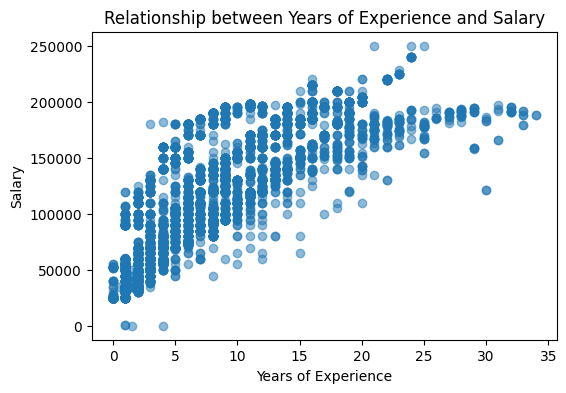

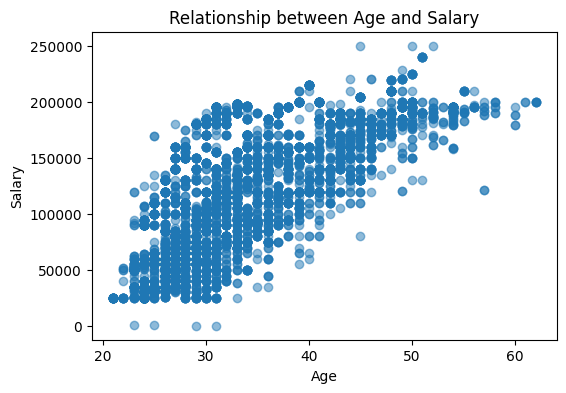

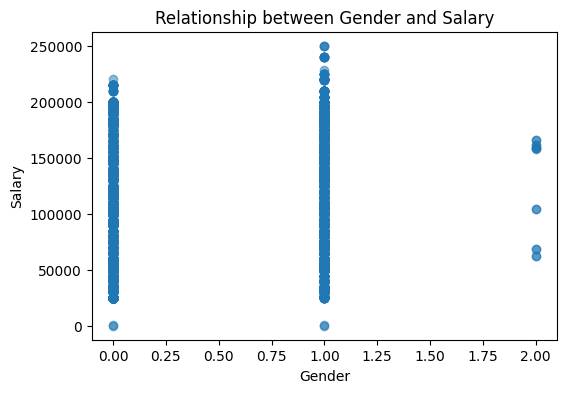

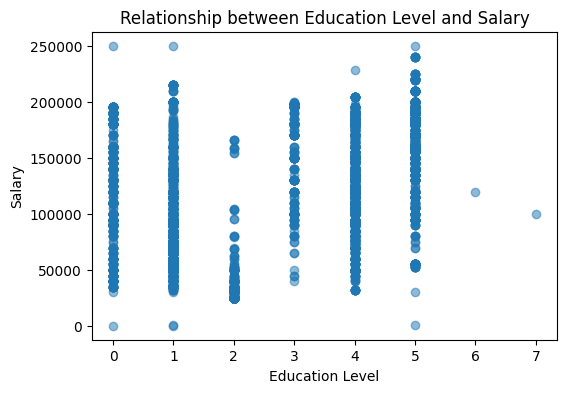

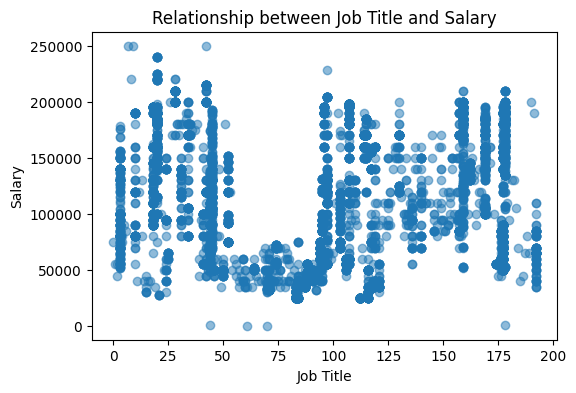

In [ ]:
#visualizing relationships between features and Salary
features_to_explore = ['Years of Experience', 'Age', 'Gender', 'Education Level', 'Job Title']

for feature in features_to_explore:  

    plt.figure(figsize=(6,4))  
    plt.scatter(df[feature], df['Salary'], alpha=0.5)  
  

    plt.xlabel(feature)  
   

    plt.ylabel("Salary")  
   

    plt.title(f"Relationship between {feature} and Salary")  

    plt.show() 

In [ ]:
#separating features and target variable
X = df.drop('Salary', axis=1)
y = df['Salary']

In [ ]:
#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [ ]:
#training the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#making predictions with linear regression model
y_pred_lin = lin_reg.predict(X_test)

In [ ]:
#evaluating linear regression model
print("Linear Regression:")
print("R2:", r2_score(y_test, y_pred_lin))
print("MAE:", mean_absolute_error(y_test, y_pred_lin))

Linear Regression:
R2: 0.6714662119287893
MAE: 24559.081499767864


In [ ]:
#training the polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print("Polynomial Regression:")
print("R2:", r2_poly)
print("MAE:", mae_poly)

Polynomial Regression:
R2: 0.8625785886733024
MAE: 14957.266721185824


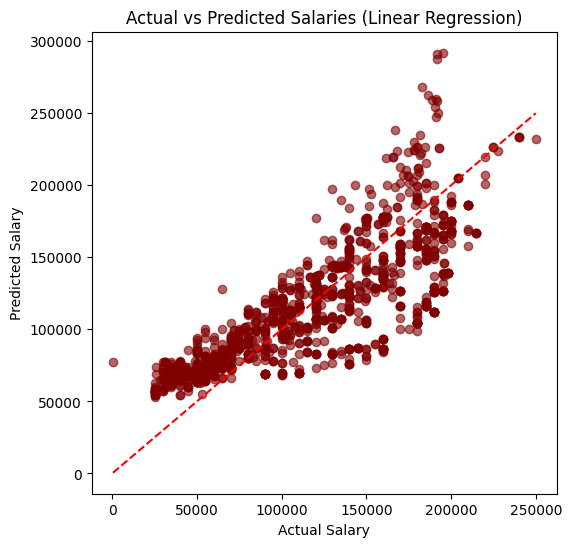

In [ ]:
#visualizing Actual vs Predicted Salaries for Linear Regression
y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='Maroon', alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salaries (Linear Regression)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()